In [19]:
import mlflow
import matplotlib.pyplot as plt

mlflow.set_experiment("predicting_wind_solar")

You can access the mlflow data using the high level API like so:

In [13]:
runs = mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.r2,metrics.rmse,metrics.mae,metrics.val_loss,...,params.opt_amsgrad,params.opt_beta_1,params.opt_learning_rate,params.opt_decay,params.opt_epsilon,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.log-model.history
0,f4a73729ff24418f9261b69ea7dd41ba,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:35.587000+00:00,2020-06-05 06:47:39.527000+00:00,0.866985,2.249559,1.466631,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""f4a73729ff24418f9261b69ea7dd41ba""..."
1,d91bc2b8227f431cbffac238fe6ea0b7,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:33.593000+00:00,2020-06-05 06:47:35.584000+00:00,0.804377,2.720762,1.871190,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""d91bc2b8227f431cbffac238fe6ea0b7""..."
2,56456e2fa34040dd802249effe40f4af,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:32.424000+00:00,2020-06-05 06:47:33.590000+00:00,0.643118,3.664077,2.653799,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""56456e2fa34040dd802249effe40f4af""..."
3,e9b8985b9c85466bb6f4b665a9d7b2da,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:30.880000+00:00,2020-06-05 06:47:32.421000+00:00,0.866090,2.256797,1.470152,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""e9b8985b9c85466bb6f4b665a9d7b2da""..."
4,6d1a007e09dd495ab5fb5d16a9c28ba9,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:30.089000+00:00,2020-06-05 06:47:30.877000+00:00,0.801275,2.742975,1.887276,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""6d1a007e09dd495ab5fb5d16a9c28ba9""..."
5,f61edea21a80458fa3e56348725a5db1,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:29.609000+00:00,2020-06-05 06:47:30.086000+00:00,0.642722,3.666321,2.652644,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""f61edea21a80458fa3e56348725a5db1""..."
6,2587240363f8410f94337cb75ba46fe1,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:29.002000+00:00,2020-06-05 06:47:29.605000+00:00,0.863787,2.276594,1.484814,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""2587240363f8410f94337cb75ba46fe1""..."
7,40cdfbc7d30846118fd2f20033f8f514,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:28.633000+00:00,2020-06-05 06:47:28.999000+00:00,0.800851,2.745609,1.892010,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""40cdfbc7d30846118fd2f20033f8f514""..."
8,8ca49f073e684c1a96382bd2e6ff4e59,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:28.414000+00:00,2020-06-05 06:47:28.631000+00:00,0.639718,3.679514,2.665974,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""8ca49f073e684c1a96382bd2e6ff4e59""..."
9,57fbddc0cf494a629a4d147c68713aeb,1,FINISHED,file:///C:/Users/shint1/PycharmProjects/DSGoPi...,2020-06-05 06:47:28.102000+00:00,2020-06-05 06:47:28.411000+00:00,0.860236,2.305985,1.496529,NaN,...,None,None,None,None,None,LOCAL,rf,D:\anaconda3\lib\site-packages\ipykernel_launc...,shint1,"[{""run_id"": ""57fbddc0cf494a629a4d147c68713aeb""..."


In [17]:
keras_ids = runs.loc[runs["tags.mlflow.runName"] == "keras", "run_id"]
keras_ids

12    0830b966858a491784c756c484f17bb1
13    f95fda613d4a4c75a1f15e2fcb6291c6
14    47c62b9cc34b4c3b93aae5791af3df5a
Name: run_id, dtype: object

In [42]:
for run_id in keras_ids:
    run = mlflow.get_run(run_id).data.to_dictionary()
    print(run_id)
    print(run["metrics"])
    print(run["params"])

0830b966858a491784c756c484f17bb1
{'loss': 5.315708160400391, 'mae': 1.5079704523086548, 'rmse': 2.305582046508789, 'val_loss': 5.590874671936035, 'val_mae': 1.561003565788269, 'val_rmse': 2.3645031452178955}
{'batch_size': '256', 'epochs': '200', 'opt_amsgrad': 'False', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_decay': '0.0', 'opt_epsilon': '1e-07', 'opt_learning_rate': '0.001', 'opt_name': 'Adam', 'validation_split': '0.2'}
f95fda613d4a4c75a1f15e2fcb6291c6
{'loss': 5.5043864250183105, 'mae': 1.5425400733947754, 'rmse': 2.3461427688598633, 'val_loss': 5.6923747062683105, 'val_mae': 1.5740487575531006, 'val_rmse': 2.3858697414398193}
{'batch_size': '256', 'epochs': '200', 'opt_amsgrad': 'False', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_decay': '0.0', 'opt_epsilon': '1e-07', 'opt_learning_rate': '0.001', 'opt_name': 'Adam', 'validation_split': '0.2'}
47c62b9cc34b4c3b93aae5791af3df5a
{'loss': 5.680868148803711, 'mae': 1.564651608467102, 'rmse': 2.3834571838378906, 'val_loss

Or you can go one layer down

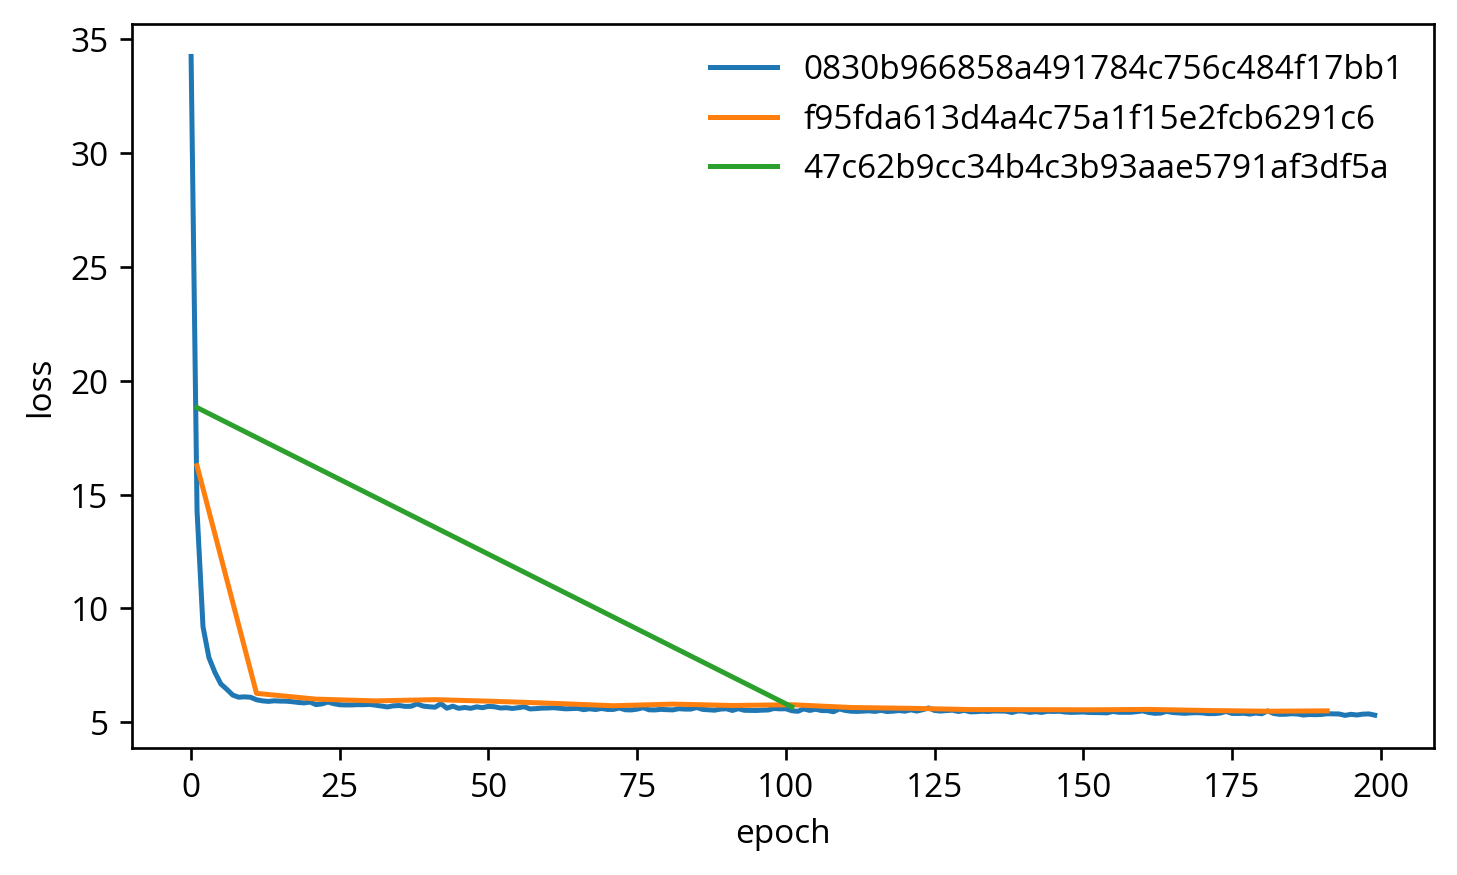

In [50]:
client = mlflow.tracking.MlflowClient()
for run_id in keras_ids:
    history = client.get_metric_history(run_id, "loss")
    epochs = [h.step for h in history]
    loss = [h.value for h in history]
    plt.plot(epochs, loss, label=run_id)
plt.legend(), plt.xlabel("epoch"), plt.ylabel("loss");